<a href="https://colab.research.google.com/github/mgp87/Jupyter_Notebooks_Collection/blob/main/Backbone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤗 Backbone API
In this notebook you can try the Backbone API and AutoBackbone class.

You could use a backbone to get features only, or you could establish a multi-stage computer vision model (backbone, neck, and a head).
Backbone API of transformers is very useful for either way. You can now get any feature from any stage of a backbone, or, you can initialize a backbone to be used at a multi-stage vision model (which is otherwise hard to do).

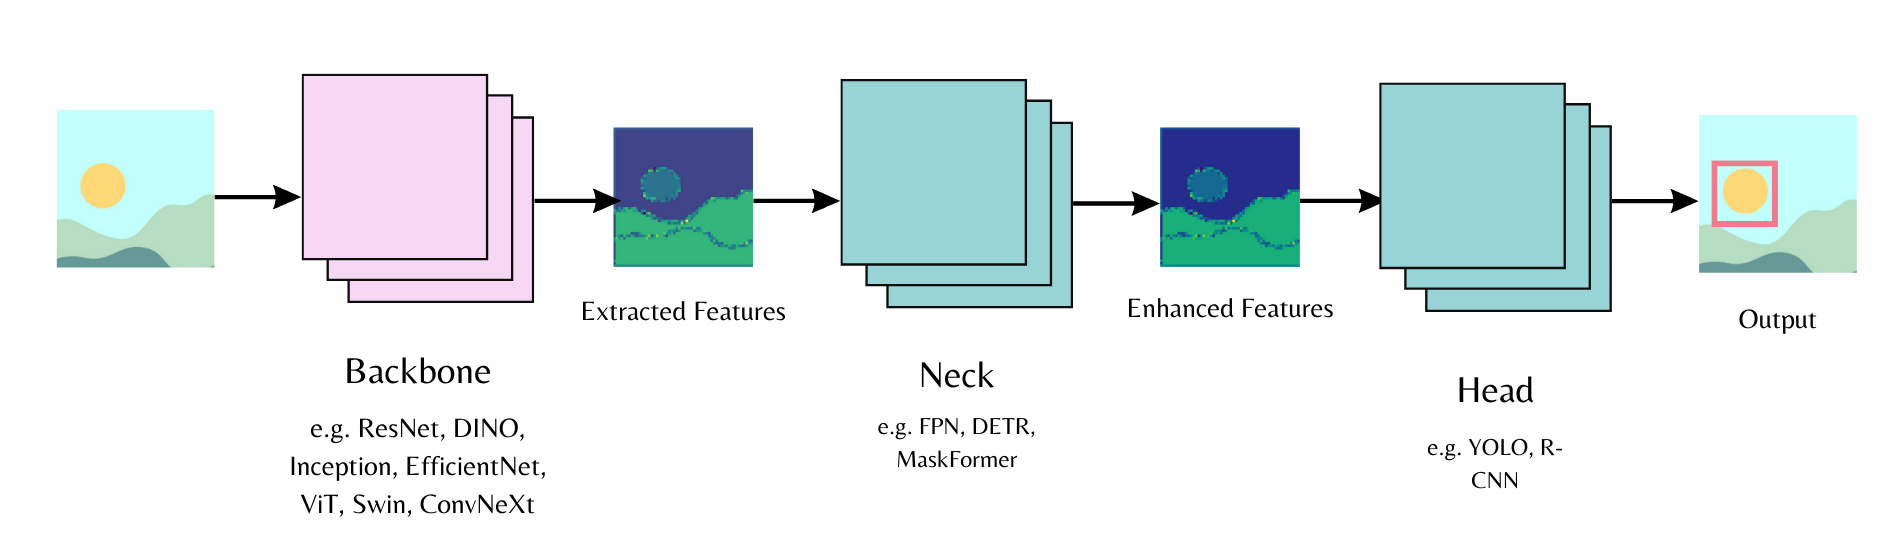

 Let's begin. We will first go through how to get features at any stage of the backbone. We can initialize any backbone using `AutoBackbone` class.

In [ ]:
from transformers import AutoImageProcessor, AutoBackbone
import torch

# initialize the backbone and the processor
processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = AutoBackbone.from_pretrained("microsoft/swin-tiny-patch4-window7-224", out_indices=(0,1,2))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinBackbone were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized: ['swin.hidden_states_norms.stage1.weight', 'swin.hidden_states_norms.stem.bias', 'swin.hidden_states_norms.stage2.weight', 'swin.hidden_states_norms.stem.weight', 'swin.hidden_states_norms.stage1.bias', 'swin.hidden_states_norms.stage2.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# get the image
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

We can now get the extracted features.

In [ ]:
inputs = processor(image, return_tensors="pt")
outputs = model(**inputs)
feature_maps = outputs.feature_maps

We will now get the features from the model stem (0th stage), first stage, and second stage.

In [ ]:
list(feature_maps[0].shape)

[1, 96, 56, 56]

In [ ]:
list(feature_maps[1].shape)

[1, 96, 56, 56]

In [ ]:
list(feature_maps[2].shape)

[1, 192, 28, 28]

Super easy, right? Now let's see how we can create a multi-stage model using ResNet backbone, and MaskFormer neck and instance segmentation head.

In [ ]:
from transformers import MaskFormerConfig, MaskFormerForInstanceSegmentation, ResNetConfig

backbone_config = ResNetConfig.from_pretrained("microsoft/resnet-50")
config = MaskFormerConfig(backbone_config=backbone_config)
model = MaskFormerForInstanceSegmentation(config)

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

You can also initialize a backbone with random weights by not passing a model checkpoint.

In [ ]:
backbone_config = ResNetConfig()
config = MaskFormerConfig(backbone_config=backbone_config)
model = MaskFormerForInstanceSegmentation(config)

You can also use a variation of backbones available in `timm`.

In [ ]:
!pip install timm

In [ ]:
from transformers import TimmBackboneConfig, TimmBackbone

backbone_config = TimmBackboneConfig("resnet50")
model = TimmBackbone(config=backbone_config)